<a href="https://colab.research.google.com/github/Erkammmm/VeriSpor/blob/main/%C3%87etkin_Erkam_Progress_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=darkred>**1. Load the train.csv**</font>

In [1]:
#Libraries needed for my work
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the csv file and exporting it to df
df = pd.read_csv("/content/drive/MyDrive/veribilimi2023 Proje/train.csv")

## <font color=darkred>2. Explore Data</font>

In [3]:
#contains general information about the dataset, for example what are the data types and how many are there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246007 entries, 0 to 246006
Columns: 122 entries, 69769 to 0.28
dtypes: float64(65), int64(41), object(16)
memory usage: 229.0+ MB


In [4]:
#Returns information about the data types in the dataset.
df.dtypes

69769                   int64
-946                    int64
0.1613                float64
0.7959999999999999    float64
Panl                   object
                       ...   
Mard                   object
0.0.14                float64
0.3333.2              float64
0.27                    int64
0.28                    int64
Length: 122, dtype: object

In [5]:
#we look at the first 5 rows and columns in the dataset
df.head()

,69769,-946,0.1613,0.7959999999999999,Panl,N,Bus2,0.0742,0,2,...,1.0.1,-4670,0.9851.2,0.0.13,0.26,Mard,0.0.14,0.3333.2,0.27,0.28
0,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
1,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
2,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
3,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
4,114510,365243,0.1067,0.8096,Panl,N,XNAA,0.0525,0,2,...,2.0,-4138,0.9861,0.0,0,Mard,0.0,0.4583,0,0


In [6]:
#It shows how many rows and how many columns the data set consists of. First is rows, second is columns
df.shape

(246007, 122)

## <font color=darkred>3.Rename Columns</font>

In [7]:
#It looks very confusing because the columns are not named. I used this code for regular naming from 1 to 122.
df.columns = ["A{}".format(i) for i in range(1,123)]

In [8]:
#columns are named and more regular
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A113,A114,A115,A116,A117,A118,A119,A120,A121,A122
0,236977,-92,NaN,NaN,NaN,Y,Othr,NaN,0,3,...,NaN,-1994,NaN,NaN,0,Mard,0.0,NaN,0,0
1,168821,-1646,0.1124,0.8504,Panl,N,Bus3,0.0387,0,2,...,2.0,-2842,0.9891,0.0,0,Sind,0.0,0.3750,0,1
2,94708,-1651,0.0263,NaN,Blok,N,Bus3,NaN,0,2,...,4.0,-1345,0.9682,0.0,0,Sind,0.0,0.0417,0,1
3,84556,-977,NaN,NaN,NaN,N,Rest,NaN,0,2,...,NaN,-852,NaN,NaN,0,Sind,0.0,NaN,0,0
4,114510,365243,0.1067,0.8096,Panl,N,XNAA,0.0525,0,2,...,2.0,-4138,0.9861,0.0,0,Mard,0.0,0.4583,0,0


## <font color=darkred>4. Analyze, Edit and Delete Missing Data   </font>

In [9]:
#displays missing data
df.isnull().sum()

A1           0
A2           0
A3      143829
A4      163543
A5      124975
         ...  
A118         0
A119       811
A120    122297
A121         0
A122         0
Length: 122, dtype: int64

In [10]:
#total number of columns with missing data
df.isnull().any().sum()

67

In [11]:
#names of all columns with missing data
df.columns[df.isnull().any()]

Index(['A3', 'A4', 'A5', 'A8', 'A11', 'A12', 'A13', 'A14', 'A15', 'A17', 'A18',
       'A19', 'A22', 'A23', 'A26', 'A28', 'A33', 'A35', 'A36', 'A37', 'A39',
       'A40', 'A41', 'A44', 'A45', 'A46', 'A49', 'A50', 'A52', 'A55', 'A57',
       'A59', 'A60', 'A61', 'A62', 'A69', 'A73', 'A75', 'A78', 'A79', 'A80',
       'A81', 'A83', 'A84', 'A85', 'A86', 'A87', 'A88', 'A89', 'A90', 'A91',
       'A92', 'A93', 'A96', 'A97', 'A100', 'A102', 'A103', 'A108', 'A110',
       'A111', 'A112', 'A113', 'A115', 'A116', 'A119', 'A120'],
      dtype='object')

In [12]:
#We see the missing values ​​in all columns as a ratio
missing_columns_percentage = df.isnull().sum() / len(df)
missing_columns_percentage

A1      0.000000
A2      0.000000
A3      0.584654
A4      0.664790
A5      0.508014
          ...   
A118    0.000000
A119    0.003297
A120    0.497128
A121    0.000000
A122    0.000000
Length: 122, dtype: float64

In [13]:
#delete columns with more than half missing values. because a column with more than half missing values ​​cannot be analyzed
del_missing_columns = missing_columns_percentage [missing_columns_percentage  > 0.5].index
df.drop(del_missing_columns , axis=1, inplace=True)


In [14]:
#Columns with missing data remaining after deletion of columns with more than half missing values
df.columns[df.isnull().any()]

Index(['A13', 'A14', 'A15', 'A17', 'A26', 'A28', 'A35', 'A36', 'A40', 'A41',
       'A45', 'A46', 'A59', 'A73', 'A81', 'A84', 'A85', 'A86', 'A90', 'A91',
       'A100', 'A110', 'A113', 'A115', 'A119', 'A120'],
      dtype='object')

In [15]:
#number of columns with total missing data available
df.isnull().any().sum()

26

In [16]:
#checks which data type the columns with missing data have. I used this code because I need to check which column has which datatype before using pipeline
df[df.columns[df.isnull().any()]].dtypes

A13     float64
A14     float64
A15      object
A17      object
A26     float64
A28     float64
A35     float64
A36     float64
A40     float64
A41     float64
A45      object
A46     float64
A59     float64
A73     float64
A81     float64
A84     float64
A85     float64
A86     float64
A90     float64
A91     float64
A100    float64
A110    float64
A113    float64
A115    float64
A119    float64
A120    float64
dtype: object

# <font color=darkred>5. Fix Missing data with Pipeline   </font>

In [18]:
#I can look at their average for each column individually and fill in missing values ​​manually with the average but there are too many columns and the pipeline does it automatically,  I used pipeline.


#Required packages for pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# We choose the strategy as mean to fill in the missing values ​​with the mean
imputer = SimpleImputer(strategy='mean')

# we select the numeric columns to be processed
missing_num = ['A13', 'A14', 'A26', 'A28', 'A35', 'A36', 'A40', 'A41',
                   'A46', 'A59', 'A73', 'A81', 'A84', 'A85', 'A86', 'A90', 'A91',
                  'A100', 'A110', 'A113', 'A115', 'A119', 'A120']

pipeline = Pipeline(steps=[('imputer', imputer)])

df[missing_num] = pipeline.fit_transform(df[missing_num])

In [19]:
#I can look at their mode for each column individually and fill in missing values ​​manually with the most frequent but there are too many columns and the pipeline does it automatically,  I used pipeline.

#Required packages for pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# We choose the strategy as most_frequent to fill in the missing values ​​with most_frequent because there are categorical data we can't use mean 
imputer = SimpleImputer(strategy='most_frequent')

# we select the categorical columns to be processed
missing_cat = ['A15', 'A17', 'A45']

pipeline = Pipeline(steps=[('imputer', imputer)])

df[missing_cat] = pipeline.fit_transform(df[missing_cat])

In [20]:
#all missing data cleared
df.isnull().any().sum()

0

### <font color=darkred>6. Correlation Matrix for Data  </font>

<ipython-input-21-b83d7318cfcc>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm', center=0)


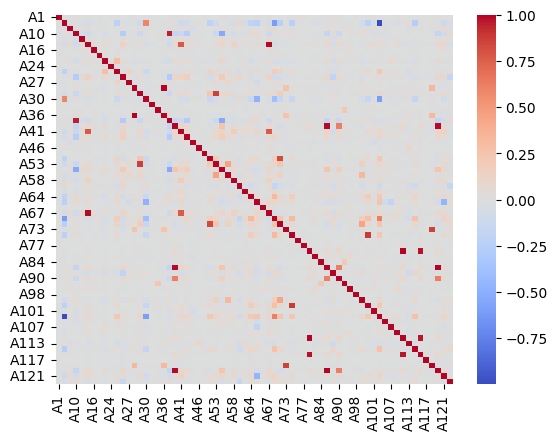

In [21]:
#I used a correlation heatmap to understand the relationship between the columns
#activation for heatmap and required packages
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.show()

In [22]:
#I resorted to filtering because there are too many columns
# Filter out correlations greater than 0.8

corr_matrix = df.corr()

high_corr = corr_matrix[abs(corr_matrix) > 0.8]

high_corr = high_corr[high_corr != 1.0].dropna(how='all', axis=1)










<ipython-input-22-21d72ed0bfff>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [28]:
#I assigned high correlation columns to high_corr_columns as a list
 high_corr_columns = list(high_corr.columns)
 high_corr_columns



['A2',
 'A10',
 'A14',
 'A28',
 'A29',
 'A36',
 'A38',
 'A40',
 'A51',
 'A53',
 'A67',
 'A72',
 'A73',
 'A74',
 'A81',
 'A85',
 'A100',
 'A105',
 'A110',
 'A115',
 'A119',
 'A120']

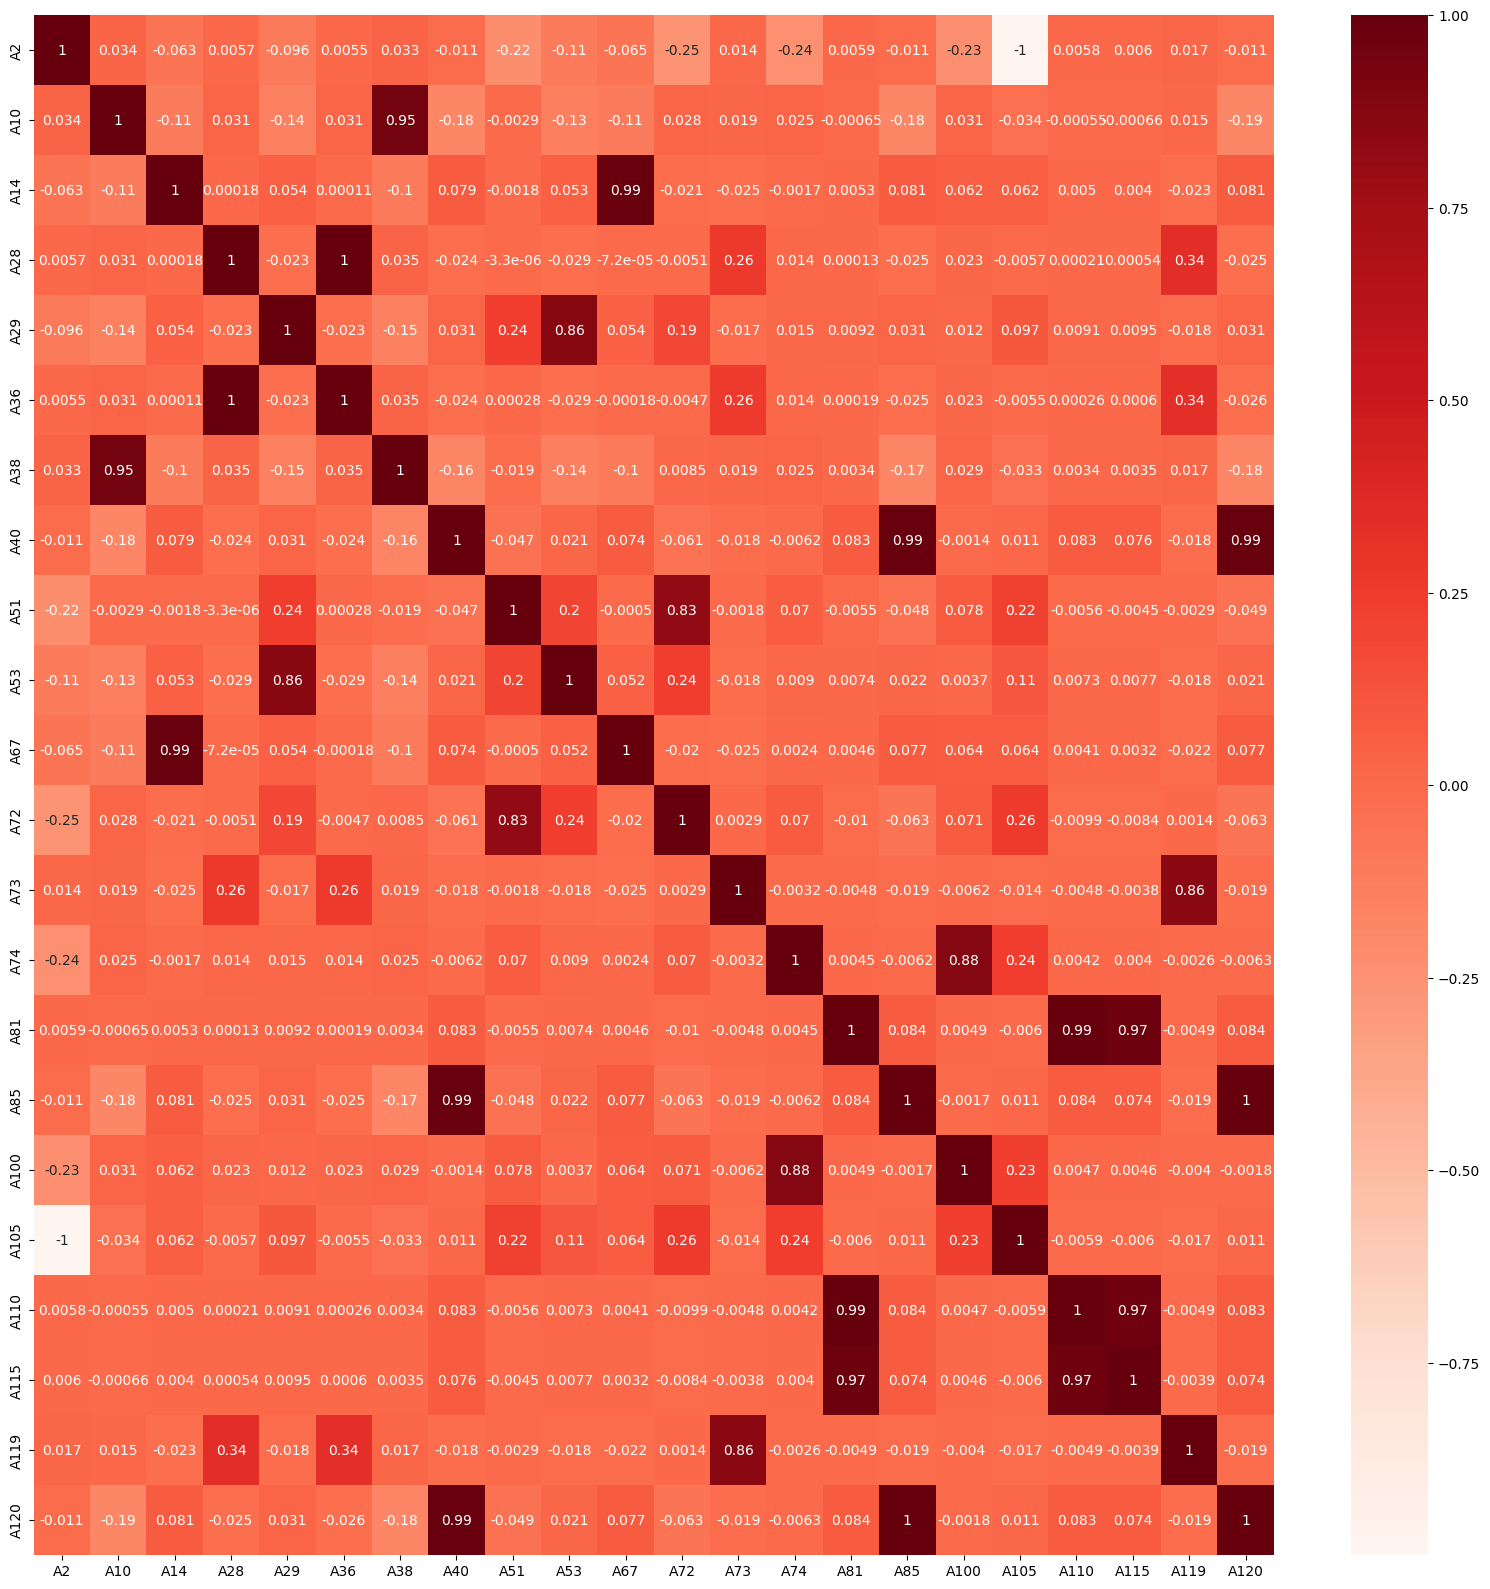

In [41]:
# Correlations showing greater than 0.8 among themselves in a heatmap and which columns will be analyzed and visualized with each other, it is seen on the heatmap

high_corr_columns_df = df[['A2', 'A10', 'A14', 'A28', 'A29', 'A36', 'A38', 'A40', 'A51', 'A53', 'A67', 'A72', 'A73', 'A74', 'A81', 'A85', 'A100', 'A105', 'A110', 'A115', 'A119', 'A120']]
corr = high_corr_columns_df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

## <font color=darkred> 7. Visualization Methods </font> 

<Axes: ylabel='Frequency'>

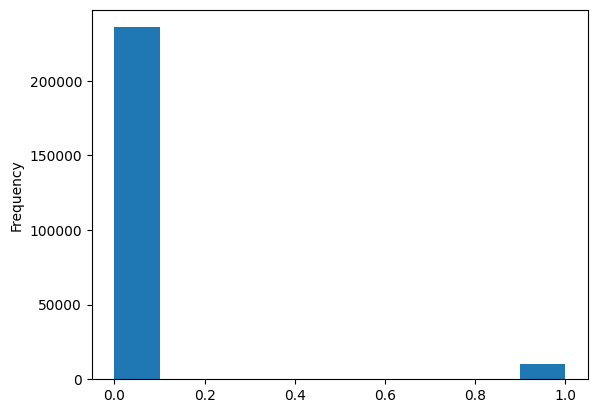

In [31]:
# visualization with histogram
df["A29"].plot.hist()

<Axes: ylabel='Frequency'>

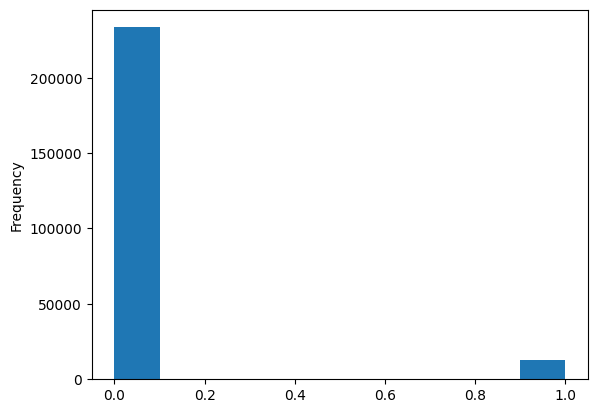

In [32]:
# visualization with histogram
df["A53"].plot.hist()

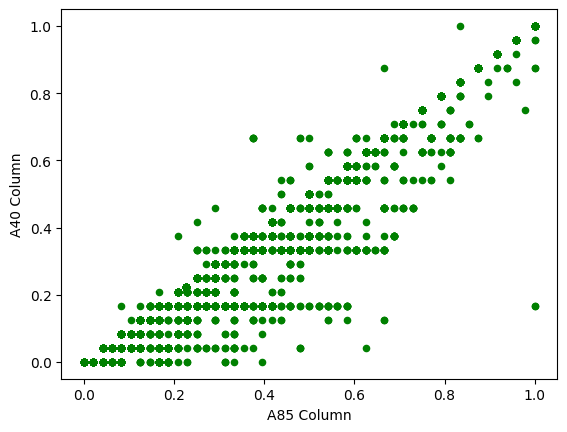

In [36]:
# I used scatter plot to examine the relationship between two columns based on correlation heatmap
df.plot(kind='scatter', x='A85', y='A40', color='green')
plt.xlabel("A85 Column")
plt.ylabel("A40 Column")
plt.show()

<Axes: ylabel='Frequency'>

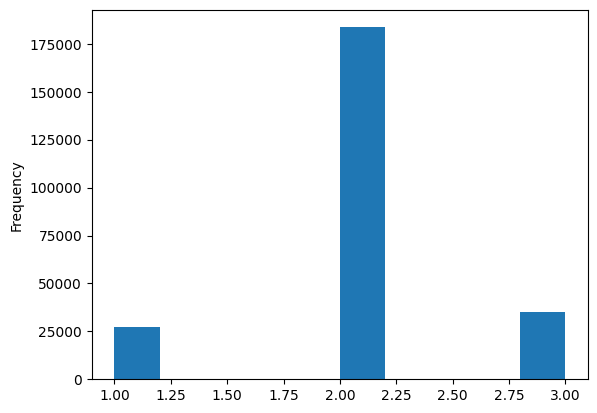

In [ ]:
#visualization with histogram
df["A10"].plot.hist()

<Axes: ylabel='Frequency'>

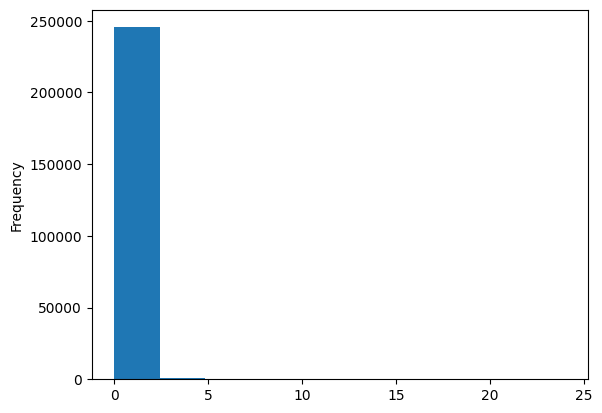

In [38]:
#visualization with histogram
df["A73"].plot.hist()

<Axes: ylabel='Frequency'>

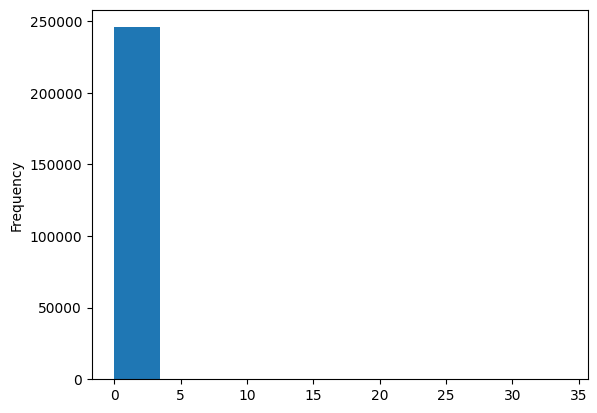

In [39]:
##visualization with histogram
# We can delete this column because they ara same with A73 Column
df["A119"].plot.hist()

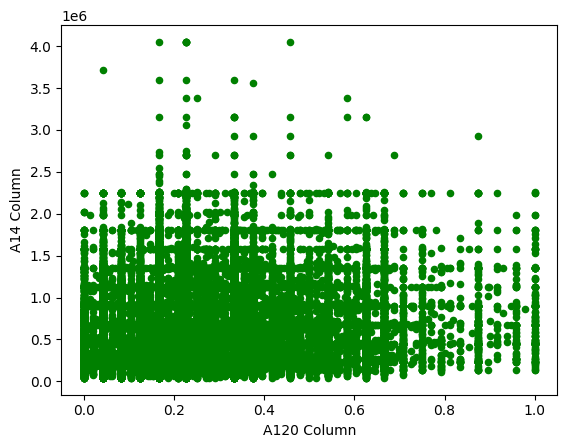

In [ ]:
# I used scatter plot to examine the relationship between two columns based on correlation heatmap
df.plot(kind='scatter', x='A120', y='A14', color='green')
plt.xlabel("A120 Column")
plt.ylabel("A14 Column")
plt.show()

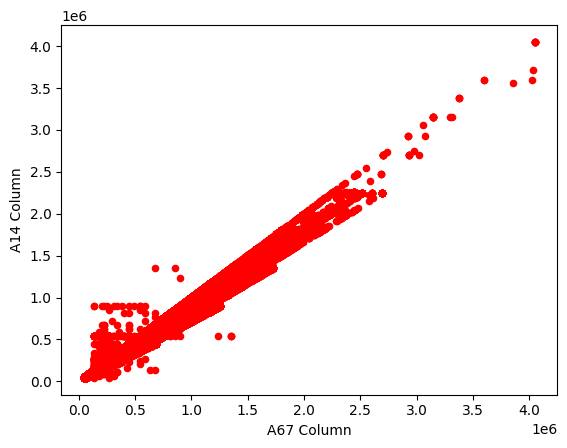

In [40]:
# I used scatter plot to examine the relationship between two columns based on correlation heatmap
df.plot(kind='scatter', x='A67', y='A14', color='red')
plt.xlabel("A67 Column")
plt.ylabel("A14 Column")
plt.show()

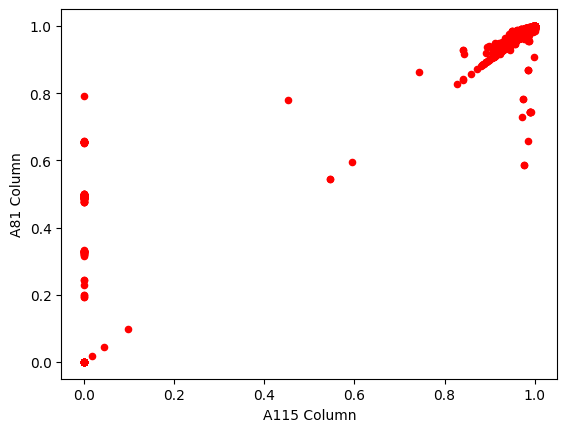

In [42]:
# I used scatter plot to examine the relationship between two columns based on correlation heatmap
df.plot(kind='scatter', x='A115', y='A81', color='red')
plt.xlabel("A115 Column")
plt.ylabel("A81 Column")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3f10c86520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3f10c869d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3f10c86280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3f10c86f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3f13a601f0>],
 'means': []}

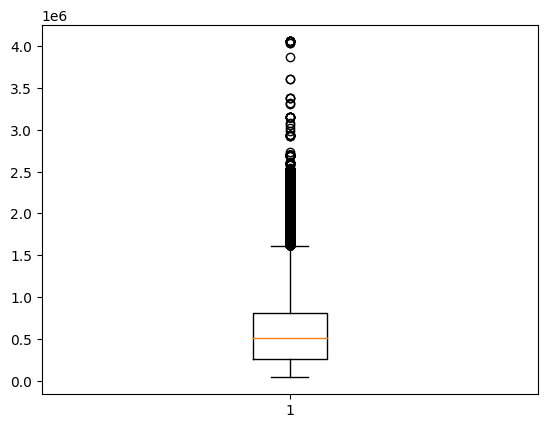

In [53]:
# I used boxplot for A1 column
plt.boxplot(df["A67"])

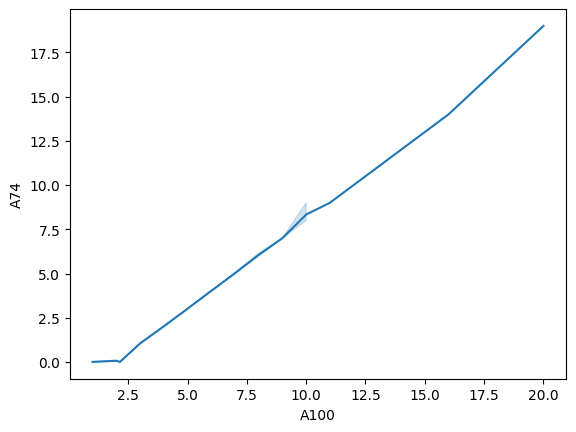

In [54]:
# I used line plot to examine the relationship between two columns based on correlation heatmap
sns.lineplot(x="A100", y="A74", data=df)
plt.show()